# AUTHORS

- **Mathieu Breier**  
  *BSE DSDM 2023-2024*  
  Email: [mathieu.breier@bse.eu](mailto:mathieu.breier@bse.eu)

- **Guillem Mirabent**  
  *BSE DSDM 2023-2024*  
  Email: [guillem.mirabent@bse.eu](mailto:guillem.mirabent@bse.eu)

# INDEX

# LOAD & IMPORTS

In [1086]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, roc_curve, auc, confusion_matrix

from utils_preproc import *

import klib as kl 
import plotly.express as px

import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import keras
import tensorflow as tf
from keras import ops
from keras import layers, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

import gensim.downloader as api
from gensim.models import KeyedVectors, Word2Vec
import gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guillemmirabentrubinat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1029]:
data = pd.read_csv('../Spanish_Parliament_Speeches.csv')
data = kl.clean_column_names(data)
display(data)

,text_id,id,title,date,body,term,session,meeting,sitting,agenda,...,party_status,party_orientation,speaker_id,speaker_name,speaker_gender,speaker_birth,is_in_english,key,speech_text,speech_text_preprocessed
0,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u3,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Centro-derecha - Derecha,JaimeDeOlanoVela,"De Olano Vela, Jaime",M,1970,False,ParlaMint-ES_2022-06-29-CD220629.u3,"Gracias, presidenta. Señora Calviño, los dos ú...",gracias presidenta señora calviño dos último d...
1,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u5,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Coalition,Centro-izquierda,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",F,1968,False,ParlaMint-ES_2022-06-29-CD220629.u5,"Gracias, presidenta. Voy a responder a la preg...",gracias presidenta ir responder pregunta tener...
2,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u7,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Centro-derecha - Derecha,JaimeDeOlanoVela,"De Olano Vela, Jaime",M,1970,False,ParlaMint-ES_2022-06-29-CD220629.u7,"Señora Calviño, menos mal que funcionan sus me...",señora calviño menos mal funcionar medida infl...
3,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u9,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Coalition,Centro-izquierda,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",F,1968,False,ParlaMint-ES_2022-06-29-CD220629.u9,"Muchas gracias. Ya es mala suerte, señor Olano...",gracia ser malo suerte señor olano poner usted...
4,ParlaMint-ES_2022-06-29-CD220629,ParlaMint-ES_2022-06-29-CD220629.u12,Sesión plenaria núm. 191 (2022-06-29),2022-06-29,Cámara Baja,Legislatura XIV,Sesión plenaria núm. 191,-,2022-06-29,-,...,Opposition,Derecha - Extrema derecha,IvánEspinosaDeLosMonterosDeSimón,"Espinosa De Los Monteros De Simón, Iván",M,1971,False,ParlaMint-ES_2022-06-29-CD220629.u12,"Gracias, señora presidenta. Señora vicepreside...",gracias señora presidenta señora vicepresident...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u120,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda - izquierda,GabrielRufiánRomero,"Rufián Romero, Gabriel",M,1982,False,ParlaMint-ES_2016-11-15-CD161115.u120,"Señora presidenta, por alusiones, quería conte...",señora presidentar alusión querer contestar se...
32547,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u122,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda - izquierda,GabrielRufiánRomero,"Rufián Romero, Gabriel",M,1982,False,ParlaMint-ES_2016-11-15-CD161115.u122,Es la falsedad que ha comentado el portavoz de...,ser falsedad haber comentar portavoz grupo soc...
32548,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u124,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",M,1966,False,ParlaMint-ES_2016-11-15-CD161115.u124,"Señora presidenta, tengo un vídeo donde el señ...",señora presidenta tener vídeo señor rufián cua...
32549,ParlaMint-ES_2016-11-15-CD161115,ParlaMint-ES_2016-11-15-CD161115.u126,Sesión plenaria núm. 14 (2016-11-15),2016-11-15,Cámara Baja,Legislatura XII,Sesión plenaria núm. 14,-,2016-11-15,-,...,Opposition,Centro-izquierda,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ánge

# DATA PREPARATION

In [1030]:
sel_cols = ['date', 'party_status', 'speaker_party', 'speaker_gender', 'speaker_id', 'speaker_name', 'speaker_birth', 'term', 'speech_text_preprocessed']

data = data[sel_cols]

In [1031]:
power_definer(data)

In [1032]:
data.loc[data['speaker_id'] == 'CarmenRiobolosRegadera', 'speaker_id'] = 'CarmenRiolobosRegadera'

In [1033]:
list_of_interest_parties = ['PP', 'PSOE', 'UP', 'Vox', 'ERC-S', 'JxCat-Junts', 'EAJ-PNV', 'EH Bildu', 'CiU', 'ERC-CATSÍ']

data = data[data['speaker_party'].isin(list_of_interest_parties)]

display(data[['speaker_name', 'speaker_party']].head())

,speaker_name,speaker_party
0,"De Olano Vela, Jaime",PP
1,"Calviño Santamaría, Nadia",PSOE
2,"De Olano Vela, Jaime",PP
3,"Calviño Santamaría, Nadia",PSOE
4,"Espinosa De Los Monteros De Simón, Iván",Vox


In [1034]:
age_dict = {
    'JuanLuisSotoBurillo': 1978,
    'JoséCarlosDuránPeralta': 1987,
    'JoséCarlosDíazRodríguez': 1967,
    'CarmenRiolobosRegadera': 1953,
    'MaríaDelMarArnaizGarcía': 1966,
    'JoséIgnacioWertOrtega': 1950,
    'JoséManuelGarcíaMargalloyMarfil': 1944,
    'JulioVillarrubiaMediavilla': 1957,
    'EmilioBarbónMartínez': 1930,
    'CarmenCastellanoiFernández': 1959
}

# map speaker to age 
data.loc[data['speaker_birth'] == '-', 'speaker_birth'] = data.loc[data['speaker_birth'] == '-', 'speaker_id'].map(age_dict)
print(data['speaker_birth'].unique())

data[data['speaker_birth'] == '-']

['1970' '1968' '1971' '1972' '1967' '1966' '1988' '1959' '1962' '1979'
 '1976' '1957' '1978' '1965' '1977' '1985' '1975' '1949' '1969' 1978
 '1973' '1951' '1980' '1964' '1989' '1958' '1974' '1982' '1996' '1961'
 '1952' 1987 '1954' '1981' '1984' '1956' '1963' '1960' '1990' '1983'
 '1986' '1993' '1947' '1991' 1967 '1992' '1987' '1955' '1953' 1953 1966
 '1948' '1944' '1950' '1937' 1950 '1945' 1944 1957 1930 1959 '1946' '1943']


,date,speaker_party,speaker_gender,speaker_id,speaker_name,speaker_birth,term,speech_text_preprocessed,party_in_power


In [1035]:
data['speaker_birth'] = data['speaker_birth'].astype(int)
age_getter(data)

In [1036]:
print(data.speaker_gender.unique())

display(data[data['speaker_gender'] == 'U'])
data.loc[data.speaker_gender == 'U', 'speaker_gender'] = 'F'
print(data.speaker_gender.unique())

gender_map = {
    'M': 1,
    'F': 0
}

data['speaker_gender'] = data['speaker_gender'].map(gender_map)

['M' 'F' 'U']


,date,speaker_party,speaker_gender,speaker_id,speaker_name,term,speech_text_preprocessed,party_in_power,speaker_age
2762,2022-11-23,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente señorías señor garzón...,0,69
2909,2022-02-24,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señora presidenta señor garzón alegrar...,0,69
2910,2022-02-24,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,estarer pendiente consumidor ser importante bu...,0,69
4676,2022-02-01,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente sánchez cesar garzón ...,0,69
4692,2022-02-01,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,NaN,0,69
15223,2021-03-11,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracia señora presidenta buen día señoría defi...,0,68
17939,2021-12-02,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente señorías señor minist...,0,68
20188,2021-11-24,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,gracias señor presidente señorías señor garzón...,0,68
20317,2021-09-29,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,señor garzón irrelevancia gobierno ser directa...,0,68
20319,2021-09-29,PP,U,CarmenRiolobosRegadera,"Riolobos Regadera, Carmen",Legislatura XIV,ideología traer pobreza subida energía haber p...,0,68


['M' 'F']


In [1037]:
print(data.term.unique())

# label encode term columns 
print(data.term.unique())

term_map = {
    'Legislatura X': 0,
    'Legislatura XI': 1,
    'Legislatura XII': 2,
    'Legislatura XIII': 3,
    'Legislatura XIV': 4
}

data['term'] = data['term'].map(term_map)

print(data.term.unique())

['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
['Legislatura XIV' 'Legislatura X' 'Legislatura XII' 'Legislatura XIII'
 'Legislatura XI']
[4 0 2 3 1]


In [1038]:
data.dropna(subset=['speech_text_preprocessed'], inplace=True)

In [1039]:
data['speech_text_preprocessed_tokenized'] = data['speech_text_preprocessed'].str.split()

In [1040]:
"""
Without taking those giveaways out the model is performing at over 90% ROC AUC scores for the
PSOE-PP test set. This is good for this specific model, but it sacrifices a little bit of 
performance with regards to the Podemos-Vox test set.
"""

giveaways = ['pedro', 'sánchez', 'pablo', 'casado', 'mariano', 'rajoy', 'santiago', 'abascal', 
                'cristóbal', 'montoro', 'psoe', 'socialista', 'podemos', 'maría', 'montero', 'bildu', 
                'partido', 'popular', 'pp', 'mariano', 'rajoy', 'comú', 'podem', 'junts', 'per', 'vox',
                'vasco', 'pnv', 'simón', 'feijóo', 'aznar', 'arrimadas', 'illa', 'iglesias',
                'salvador', 'calviño', 'ábalos', 'robles', 'zapatero', 'marlaska', 'espinosa',
                'señora', 'señor', 'ministra', 'ministro', 'presidente', 'presidenta', 'gobierno', 
                'ser', 'haber', 'hacer', 'francina', 'armengol', 'decir', 'gracias', 'usted',
                'meritxell', 'batet', 'ana', 'pastor', 'patxi', 'lópez', 'jesús', 'posada']


spanish_stop_words = set(stopwords.words('spanish'))

# Combine the NLTK and custom stop words
custom_stopwords = spanish_stop_words.union(giveaways)

words_relevant = ['no', 'sí', 'bien', 'mal', 'me', 'mí']
for word in words_relevant:
    custom_stopwords.discard(word)

"""
If you want to run the model without those stopwords, just uncomment the line below.
"""
# custom_stopwords = spanish_stop_words

data['speech_text_preprocessed_tokenized'] = [remove_stopwords(speech, custom_stopwords) for speech in data['speech_text_preprocessed_tokenized']]

In [1041]:
# cut off len of speech text > 100 

min_len = 50

print(data.shape)
data = brickwall_limiter(data, 'speech_text_preprocessed_tokenized', min_len)
print(data.shape)

(22489, 10)
(16733, 11)


In [1042]:
maxlen = 250

print(data.shape)
data = limit_splitter(data, maxlen)
print(data.shape)

(16733, 11)
(31675, 11)


In [1043]:
data = brickwall_limiter(data, 'speech_text_preprocessed_tokenized', min_len)
print(data.shape)

(29657, 11)


In [1044]:
display(data)

,date,speaker_party,speaker_gender,speaker_id,speaker_name,term,speech_text_preprocessed,party_in_power,speaker_age,speech_text_preprocessed_tokenized,speech_text_preprocessed_len
0,2022-06-29,PP,1,JaimeDeOlanoVela,"De Olano Vela, Jaime",4,gracias presidenta señora calviño dos último d...,0,52,"[dos, último, dato, publicado, INE, pírrico, 0...",68
1,2022-06-29,PSOE,0,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",4,gracias presidenta ir responder pregunta tener...,1,54,"[ir, responder, pregunta, tener, registrado, i...",82
2,2022-06-29,PP,1,JaimeDeOlanoVela,"De Olano Vela, Jaime",4,señora calviño menos mal funcionar medida infl...,0,52,"[menos, mal, funcionar, medida, inflación, 10,...",145
3,2022-06-29,PSOE,0,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",4,gracia ser malo suerte señor olano poner usted...,1,54,"[gracia, malo, suerte, olano, poner, criticar,...",132
4,2022-06-29,Vox,1,IvánEspinosaDeLosMonterosDeSimón,"Espinosa De Los Monteros De Simón, Iván",4,gracias señora presidenta señora vicepresident...,0,51,"[vicepresidenta, escuchar, ver, seguir, mismo,...",191
...,...,...,...,...,...,...,...,...,...,...,...
31670,2016-11-15,PSOE,1,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",2,señora presidenta señoría contar amigo josé an...,0,50,"[señoría, contar, amigo, josé, andrés, torres,...",102
31671,2016-11-15,PSOE,1,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",2,caso dinero público deber ser gastar honestida...,0,50,"[caso, dinero, público, deber, gastar, honesti...",189
31672,2016-11-15,PP,1,JaimeEduardoDeOlanoVela,"Olano Vela, Jaime Eduardo De",2,gracias señora presidenta debatimos hoy confor...,1,46,"[debatimos, hoy, conformidad, dispuesto, artíc...",250
31673,2016-11-15,PP,1,JaimeEduardoDeOlanoVela,"Olano Vela, Jaime Eduardo De",2,gracias señora presidenta debatimos hoy confor...,1,46,"[aproximadamente, 87, superior, coste, diputad...",152


In [1045]:
# embeddings_file = '../embeddings-l-model.vec'
# wordvecs = KeyedVectors.load_word2vec_format(embeddings_file)

In [1046]:
# wordvecs_file = '../SBW-vectors-300-min5.bin'
# wordvecs2 = KeyedVectors.load_word2vec_format(wordvecs_file, binary=True)

In [1047]:
data['speech_text_preprocessed_tokenized'] = data['speech_text_preprocessed_tokenized'].apply(lambda x: ' '.join(x))
# display(data)

In [1048]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['speech_text_preprocessed_tokenized'])
data['speech_text_preprocessed_tokenized'] = tokenizer.texts_to_sequences(data['speech_text_preprocessed_tokenized'])
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

# seqs_padded = pad_sequences(seqs, maxlen=maxlen, padding='pre')
# print(seqs_padded)

73691


In [1049]:
# data['speech_text_preprocessed_tokenized'] = [seq for seq in seqs_padded]
display(data)

,date,speaker_party,speaker_gender,speaker_id,speaker_name,term,speech_text_preprocessed,party_in_power,speaker_age,speech_text_preprocessed_tokenized,speech_text_preprocessed_len
0,2022-06-29,PP,1,JaimeDeOlanoVela,"De Olano Vela, Jaime",4,gracias presidenta señora calviño dos último d...,0,52,"[54, 62, 160, 2570, 3407, 14211, 899, 316, 308...",68
1,2022-06-29,PSOE,0,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",4,gracias presidenta ir responder pregunta tener...,1,54,"[3, 451, 418, 1, 3158, 1243, 770, 1090, 1287, ...",82
2,2022-06-29,PP,1,JaimeDeOlanoVela,"De Olano Vela, Jaime",4,señora calviño menos mal funcionar medida infl...,0,52,"[65, 394, 696, 27, 1090, 614, 316, 592, 96, 26...",145
3,2022-06-29,PSOE,0,NadiaCalviñoSantamaría,"Calviño Santamaría, Nadia",4,gracia ser malo suerte señor olano poner usted...,1,54,"[51, 807, 1379, 5340, 35, 998, 1219, 2777, 222...",132
4,2022-06-29,Vox,1,IvánEspinosaDeLosMonterosDeSimón,"Espinosa De Los Monteros De Simón, Iván",4,gracias señora presidenta señora vicepresident...,0,51,"[729, 298, 28, 42, 26, 500, 222, 471, 222, 42,...",191
...,...,...,...,...,...,...,...,...,...,...,...
31670,2016-11-15,PSOE,1,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",2,señora presidenta señoría contar amigo josé an...,0,50,"[22, 237, 1193, 1343, 7023, 6368, 7640, 287, 3...",102
31671,2016-11-15,PSOE,1,MiguelÁngelHerediaDíaz,"Heredia Díaz, Miguel Ángel",2,caso dinero público deber ser gastar honestida...,0,50,"[50, 389, 14, 19, 1122, 4542, 1225, 632, 15, 1...",189
31672,2016-11-15,PP,1,JaimeEduardoDeOlanoVela,"Olano Vela, Jaime Eduardo De",2,gracias señora presidenta debatimos hoy confor...,1,46,"[1250, 15, 3121, 856, 136, 1334, 264, 316, 341...",250
31673,2016-11-15,PP,1,JaimeEduardoDeOlanoVela,"Olano Vela, Jaime Eduardo De",2,gracias señora presidenta debatimos hoy confor...,1,46,"[2410, 4996, 755, 436, 120, 56, 1927, 303, 226...",152


In [1050]:
# embedding_dim = 300
# seqs_embed = np.zeros((seqs_padded.shape[0], maxlen, embedding_dim))

# for i, seq in enumerate(seqs_padded):
#     for j, idx in enumerate(seq):
#         if idx != 0:
#             word = tokenizer.index_word.get(idx)
#             if word in wordvecs:
#                 seqs_embed[i, j] = wordvecs[word]

# seqs_embed = seqs_embed.astype('float32')

# data['speech_text_w2v'] = [seq for seq in seqs_embed]
# display(data)

In [1051]:
# vocab = set([token for list in data['speech_text_preprocessed_tokenized'] for token in list])
# vocab_size = len(vocab) + 1

# print(vocab_size)

In [1052]:
# data['speech_text_w2v'] = encode_data(data['speech_text_preprocessed_tokenized'], wordvecs)

# display(data.head())
# print(data.loc[0, 'speech_text_preprocessed_tokenized'])
# print(data.loc[0, 'speech_text_w2v'])

# TRAIN-TEST SPLIT

In [1053]:
podemos_vox = ['UP', 'Vox']
erc_junts = ['ERC-S', 'JxCat-Junts', 'CiU', 'ERC-CATSÍ']
bildu_pnv = ['EAJ-PNV', 'EH Bildu']
psoe_pp = ['PP', 'PSOE']

data_pv = data[data['speaker_party'].isin(podemos_vox)].copy()
data_ej = data[data['speaker_party'].isin(erc_junts)].copy()
data_bp = data[data['speaker_party'].isin(bildu_pnv)].copy()
data = data[data['speaker_party'].isin(psoe_pp)].copy()

In [1054]:
data.loc[data['speaker_party'] == 'PSOE', 'speaker_party'] = 0
data.loc[data['speaker_party'] == 'PP', 'speaker_party'] = 1

data_pv.loc[data_pv['speaker_party'] == 'UP', 'speaker_party'] = 0
data_pv.loc[data_pv['speaker_party'] == 'Vox', 'speaker_party'] = 1

data_ej.loc[data_ej['speaker_party'] == 'ERC-S', 'speaker_party'] = 0
data_ej.loc[data_ej['speaker_party'] == 'JxCat-Junts', 'speaker_party'] = 1
data_ej.loc[data_ej['speaker_party'] == 'CiU', 'speaker_party'] = 1
data_ej.loc[data_ej['speaker_party'] == 'ERC-CATSÍ', 'speaker_party'] = 0

data_bp.loc[data_bp['speaker_party'] == 'EH Bildu', 'speaker_party'] = 0
data_bp.loc[data_bp['speaker_party'] == 'EAJ-PNV', 'speaker_party'] = 1

display(data[['speaker_name', 'speaker_party']].head())

,speaker_name,speaker_party
0,"De Olano Vela, Jaime",1
1,"Calviño Santamaría, Nadia",0
2,"De Olano Vela, Jaime",1
3,"Calviño Santamaría, Nadia",0
5,"Calviño Santamaría, Nadia",0


In [1055]:
print(data['speaker_party'].value_counts(), data_pv['speaker_party'].value_counts(), data_ej['speaker_party'].value_counts(), data_bp['speaker_party'].value_counts())

speaker_party
1    8448
0    8352
Name: count, dtype: int64 speaker_party
0    2868
1    2438
Name: count, dtype: int64 speaker_party
0    2029
1    1711
Name: count, dtype: int64 speaker_party
1    2726
0    1085
Name: count, dtype: int64


In [1056]:
# Unique politicians and their party labels (assuming one politician belongs to only one party)
unique_politicians = data.groupby('speaker_id')['speaker_party'].first().reset_index()

# Splitting unique politicians into train and test to ensure no overlap
train_politicians, test_politicians = train_test_split(unique_politicians, stratify=unique_politicians['speaker_party'], test_size=0.1, random_state=168)

# Selecting rows for the train and test datasets based on the split politicians
train_df = data[data['speaker_id'].isin(train_politicians['speaker_id'])].copy()
test_df = data[data['speaker_id'].isin(test_politicians['speaker_id'])].copy()

In [1057]:
print(train_df.shape)
print(test_df.shape)

# get intersection of speaker id in train and test
train_speaker_ids = train_df['speaker_id'].unique()
test_speaker_ids = test_df['speaker_id'].unique()

intersection = list(set(train_speaker_ids) & set(test_speaker_ids))
print(intersection)

(15037, 11)
(1763, 11)
[]


In [1058]:
# split is near 50% on the training dataset
print(train_df.speaker_party.value_counts())
print(test_df.speaker_party.value_counts())

speaker_party
1    7627
0    7410
Name: count, dtype: int64
speaker_party
0    942
1    821
Name: count, dtype: int64


In [1059]:
print(train_df['speaker_party'].values.dtype)

train_df['speaker_party'] = train_df['speaker_party'].astype(np.int64)
test_df['speaker_party'] = test_df['speaker_party'].astype(np.int64)
data_pv['speaker_party'] = data_pv['speaker_party'].astype(np.int64)
data_ej['speaker_party'] = data_ej['speaker_party'].astype(np.int64)
data_bp['speaker_party'] = data_bp['speaker_party'].astype(np.int64)

print(train_df['speaker_party'].values.dtype)

object
int64


In [1060]:
XTEMP = train_df['speech_text_preprocessed_tokenized'].tolist()
X = pad_sequences(XTEMP, maxlen=maxlen, padding='pre')
y = np.array(train_df['speaker_party'])

XTESTTEMP = test_df['speech_text_preprocessed_tokenized'].tolist()
X_test = pad_sequences(XTESTTEMP, maxlen=maxlen, padding='pre')
y_test = np.array(test_df['speaker_party'])

XPVTEMP = data_pv['speech_text_preprocessed_tokenized'].tolist()
X_test_pv = pad_sequences(XPVTEMP, maxlen=maxlen, padding='pre')
y_test_pv = np.array(data_pv['speaker_party'])

XEJTEMP = data_ej['speech_text_preprocessed_tokenized'].tolist()
X_test_ej = pad_sequences(XEJTEMP, maxlen=maxlen, padding='pre')
y_test_ej = np.array(data_ej['speaker_party'])

XBPTEMP = data_bp['speech_text_preprocessed_tokenized'].tolist()
X_test_bp = pad_sequences(XBPTEMP, maxlen=maxlen, padding='pre')
y_test_bp = np.array (data_bp['speaker_party'])

In [1061]:
# X = np.array(train_df['speech_text_preprocessed_tokenized'])
# y = np.array(train_df['speaker_party'])
# X_test = np.array(test_df['speech_text_preprocessed_tokenized'])
# y_test = np.array(test_df['speaker_party'])

# X_test_pv = np.array(data_pv['speech_text_preprocessed_tokenized'])
# y_test_pv = np.array(data_pv['speaker_party'])

# X_test_ej = np.array(data_ej['speech_text_preprocessed_tokenized'])
# y_test_ej = np.array(data_ej['speaker_party'])

# X_test_bp = np.array(data_bp['speech_text_preprocessed_tokenized'])
# y_test_bp = np.array (data_bp['speaker_party'])

In [1062]:
# X = train_df['speech_text_w2v']
# y = np.array(train_df['speaker_party'])
# X_test = test_df['speech_text_w2v']
# y_test = np.array(test_df['speaker_party'])

# X_test_pv = data_pv['speech_text_w2v']
# y_test_pv = np.array(data_pv['speaker_party'])

# X_test_ej = data_ej['speech_text_w2v']
# y_test_ej = np.array(data_ej['speaker_party'])

# X_test_bp = data_bp['speech_text_w2v']
# y_test_bp = np.array (data_bp['speaker_party'])

In [1063]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape) 

Shape of X: (15037, 250)
Shape of y: (15037,)


In [1064]:
# print(X)
# print(y)

In [1065]:
# display(data.head())

# TRANSFORMER MODEL

In [1066]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [1067]:
embed_dim = 32
num_heads = 2
ff_dim = 32

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [1069]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X, y, batch_size=32, epochs=3, validation_split=0.2
)

Epoch 1/3
376/376 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.6417 - loss: 0.6094 - val_accuracy: 0.7606 - val_loss: 0.4968
Epoch 2/3
376/376 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8893 - loss: 0.2652 - val_accuracy: 0.7839 - val_loss: 0.4881
Epoch 3/3
376/376 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9586 - loss: 0.1110 - val_accuracy: 0.7896 - val_loss: 0.5881


In [1078]:
pred_train = model.predict(X)
pred_test = model.predict(X_test)

pred_train_binary = np.argmax(pred_train, axis=1)
pred_test_binary = np.argmax(pred_test, axis=1)

470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [1089]:
pred_train = pred_train[:, 1]
pred_test = pred_test[:, 1]

In [1090]:
display(y_test)
display(pred_test)

array([0, 0, 0, ..., 0, 0, 0])

array([0.5332116 , 0.29066786, 0.9849443 , ..., 0.35172448, 0.73445857,
       0.97103924], dtype=float32)

In [1083]:
print('Results Transformer:')
print(classification_report(y_test, pred_test_binary))

Results Transformer Argmax:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       942
           1       0.66      0.80      0.72       821

    accuracy                           0.71      1763
   macro avg       0.72      0.72      0.71      1763
weighted avg       0.73      0.71      0.71      1763



In [1092]:
print('Confusion Matrix Transformer:')
show_confusion_matrix(y_test, pred_test_binary)

Confusion Matrix Transformer:


NameError: name 'show_confusion_matrix' is not defined

ROC AUC curve Transformer Argmax:
####################
ROC AUC curve Transformer:


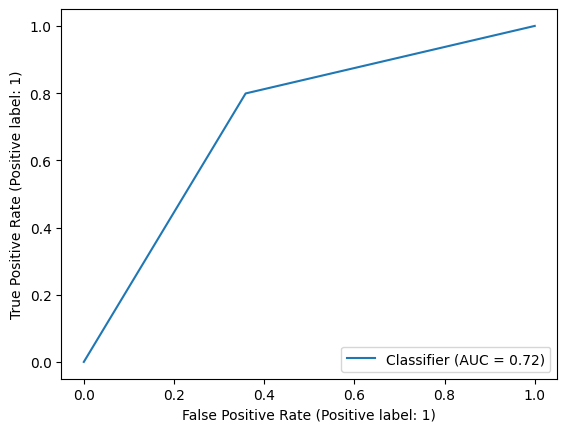

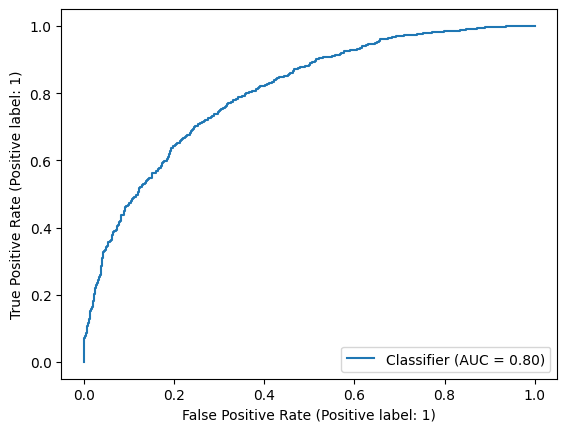

In [1091]:
print('ROC AUC curve Transformer Argmax:')
print(RocCurveDisplay.from_predictions(y_test, pred_test_binary))
print('#'*20)
print('ROC AUC curve Transformer:')
print(RocCurveDisplay.from_predictions(y_test, pred_test))

In [1094]:
pred_data = pd.DataFrame({'true': y_test, 'pred': pred_test, 'gender': test_df['speaker_gender'], 'term': test_df['term']})

In [1095]:
display(pred_data)

,true,pred,gender,term
19,0,0.533212,1,4
21,0,0.290668,1,4
23,0,0.984944,1,4
25,0,0.391882,1,4
26,0,0.455776,1,4
...,...,...,...,...
31584,0,0.899065,1,2
31641,0,0.375006,1,2
31642,0,0.351724,1,2
31670,0,0.734459,1,2


In [1096]:
male_pred = pred_data[pred_data['gender'] == 1]
fem_pred = pred_data[pred_data['gender'] == 0]

In [1097]:
pred_data['term'].value_counts()

term
4    986
2    460
0    247
3     58
1     12
Name: count, dtype: int64

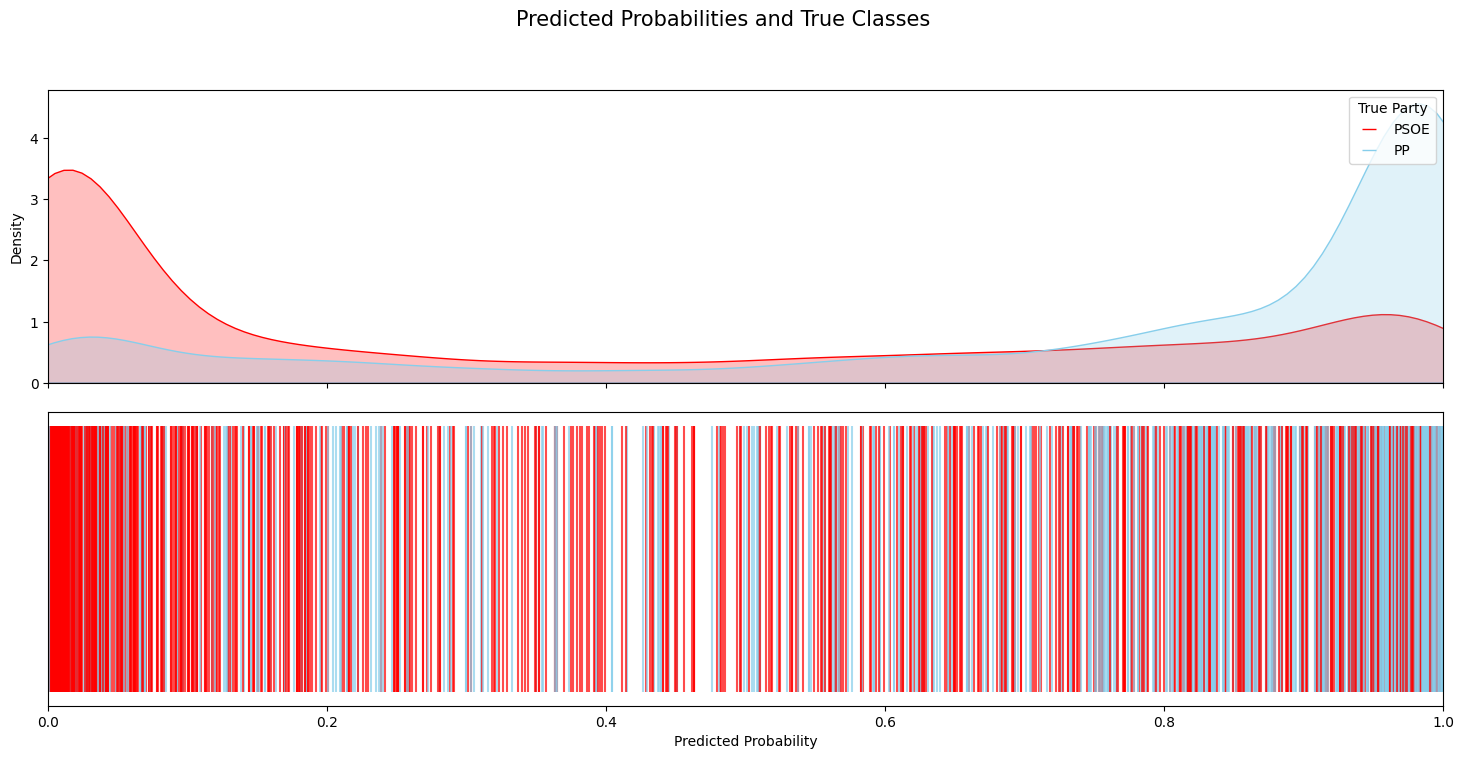

In [1098]:
cool_party_plot(pred_data, 'red', 'skyblue', 'PSOE', 'PP')

In [1077]:
print(pred_train)

[0.99445885 0.00118089 0.99347657 ... 0.997437   0.92068994 0.93510896]


In [ ]:
.

# TRYING COOL THINGS

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, embed_dim):
        super().__init__()
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-2]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        return x + positions

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

# Define model parameters
embed_dim = 300  # Embedding size for each token (should match your word vector dimension)
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

# Input layer
inputs = layers.Input(shape=(maxlen, embed_dim))

# Embedding layer
embedding_layer = TokenAndPositionEmbedding(maxlen, embed_dim)
x = embedding_layer(inputs)

# Transformer block
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model with validation split
history = model.fit(
    X, y, batch_size=32, epochs=2, validation_split=0.2
)


Epoch 1/2


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("functional_78_1/Cast:0", shape=(None, 250), dtype=float32). Expected shape (None, 250, 300), but input has incompatible shape (None, 250)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 250), dtype=int32)
  • training=True
  • mask=None